<p align="center"><b>NAME: MITUL DUDHAT</p>
<p align="center"><b>ID : 202318024</p>

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Setup and Data Preparation

#### I
● Install and configure PySpark in your environment.

In [93]:
!pip install pyspark

In [94]:
import pyspark

#### II
● Initialize a Spark session and load the Online News Popularity dataset into a PySpark DataFrame.

In [95]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("OnlineNewsPopularityAnalysis") \
    .getOrCreate()

In [96]:
# Load the dataset into a PySpark DataFrame
df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/SEM2/BIG DATA/Lab5_data/OnlineNewsPopularity.csv', header=True, inferSchema=True)

#### III
● Familiarize yourself with the dataset's structure and types of variables available.

In [97]:

# Count the number of rows in the dataset
print(f"Total Rows: {df.count()}")

# Print the total number of columns
print(f"Total columns: {len(df.columns)}")

Total Rows: 39644
Total columns: 61


In [98]:
# Display the first few rows of the DataFrame
df.show(5)

+--------------------+----------+---------------+-----------------+----------------+-----------------+-------------------------+----------+---------------+---------+-----------+---------------------+-------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+---------------------------+------------------+-------------------+---------------------+--------------------+------------------+--------------------+------------------+-----------+---------------+---------------+---------------+---------------+---------------+--------------------+--------------------------+---------------------------+---------------------------+--------------------+--------------------+----------------------+----------------------+----------------------+-

In [99]:
# # Display the schema of the DataFrame
# df.printSchema()

In [100]:

# Display the column names and their data types
for col_name, col_type in df.dtypes:
    print(f"Column: {col_name}, Type: {col_type}")

Column: url, Type: string
Column:  timedelta, Type: double
Column:  n_tokens_title, Type: double
Column:  n_tokens_content, Type: double
Column:  n_unique_tokens, Type: double
Column:  n_non_stop_words, Type: double
Column:  n_non_stop_unique_tokens, Type: double
Column:  num_hrefs, Type: double
Column:  num_self_hrefs, Type: double
Column:  num_imgs, Type: double
Column:  num_videos, Type: double
Column:  average_token_length, Type: double
Column:  num_keywords, Type: double
Column:  data_channel_is_lifestyle, Type: double
Column:  data_channel_is_entertainment, Type: double
Column:  data_channel_is_bus, Type: double
Column:  data_channel_is_socmed, Type: double
Column:  data_channel_is_tech, Type: double
Column:  data_channel_is_world, Type: double
Column:  kw_min_min, Type: double
Column:  kw_max_min, Type: double
Column:  kw_avg_min, Type: double
Column:  kw_min_max, Type: double
Column:  kw_max_max, Type: double
Column:  kw_avg_max, Type: double
Column:  kw_min_avg, Type: double
C

In [101]:
# # Get basic statistics of numerical columns
# df.describe().show()

# Display the summary statistics for each column
df.summary().show()

+-------+--------------------+------------------+------------------+------------------+------------------+-----------------+-------------------------+------------------+------------------+-----------------+------------------+---------------------+------------------+--------------------------+------------------------------+--------------------+-----------------------+---------------------+----------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+--------------------------+--------------------------+---------------------------+-------------------+-------------------+---------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+--------------------+--------------------------+---------------------------

### 2. Data Preprocessing

In [102]:
from pyspark.sql.functions import expr
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

#### I
● Perform data cleaning, including dealing with missing values and any irrelevant features.


In [103]:
# Display the number of missing values in each column

missing_values = {col: df.where(df[col].isNull()).count() for col in df.columns}
print("Missing values:")
for col, count in missing_values.items():
    print(f"{col}: {count}")

Missing values:
url: 0
 timedelta: 0
 n_tokens_title: 0
 n_tokens_content: 0
 n_unique_tokens: 0
 n_non_stop_words: 0
 n_non_stop_unique_tokens: 0
 num_hrefs: 0
 num_self_hrefs: 0
 num_imgs: 0
 num_videos: 0
 average_token_length: 0
 num_keywords: 0
 data_channel_is_lifestyle: 0
 data_channel_is_entertainment: 0
 data_channel_is_bus: 0
 data_channel_is_socmed: 0
 data_channel_is_tech: 0
 data_channel_is_world: 0
 kw_min_min: 0
 kw_max_min: 0
 kw_avg_min: 0
 kw_min_max: 0
 kw_max_max: 0
 kw_avg_max: 0
 kw_min_avg: 0
 kw_max_avg: 0
 kw_avg_avg: 0
 self_reference_min_shares: 0
 self_reference_max_shares: 0
 self_reference_avg_sharess: 0
 weekday_is_monday: 0
 weekday_is_tuesday: 0
 weekday_is_wednesday: 0
 weekday_is_thursday: 0
 weekday_is_friday: 0
 weekday_is_saturday: 0
 weekday_is_sunday: 0
 is_weekend: 0
 LDA_00: 0
 LDA_01: 0
 LDA_02: 0
 LDA_03: 0
 LDA_04: 0
 global_subjectivity: 0
 global_sentiment_polarity: 0
 global_rate_positive_words: 0
 global_rate_negative_words: 0
 rate_posi

There is no any null value in our data

In [104]:
from pyspark.sql.functions import col,when

# Replace empty spaces in column names with underscores
for column in df.columns:
    df = df.withColumnRenamed(column, column.replace(" ", ""))

# Display the updated DataFrame
df.show(5)

+--------------------+---------+--------------+----------------+---------------+----------------+------------------------+---------+--------------+--------+----------+--------------------+------------+-------------------------+-----------------------------+-------------------+----------------------+--------------------+---------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------------------------+-------------------------+--------------------------+-----------------+------------------+--------------------+-------------------+-----------------+-------------------+-----------------+----------+---------------+---------------+---------------+---------------+---------------+-------------------+-------------------------+--------------------------+--------------------------+-------------------+-------------------+---------------------+---------------------+---------------------+---------------------+---------------------+----

#### II
● Since the dataset contains URL data as non-predictive, ensure this is excluded from your analysis.


In [105]:
df = df.drop("url")
df = df.drop("timedelta")


#### III
● Convert the dataset's target variable (shares) into a binary outcome for classification (popular vs. not
popular) based on a threshold you define (e.g., median value).

In [106]:
from pyspark.sql.types import IntegerType

# Calculate median and mean values
median_value = df.approxQuantile("shares", [0.5], 0.01)[0]
mean_value = df.agg({"shares": "mean"}).collect()[0][0]

# Add a column with two classes based on median
df = df.withColumn("popularity_median", when(col("shares") > median_value, 1).otherwise(0))

# Add a column with two classes based on mean
df = df.withColumn("popularity_mean", when(col("shares") > mean_value, 1).otherwise(0))

In [107]:
df.show(5)


+--------------+----------------+---------------+----------------+------------------------+---------+--------------+--------+----------+--------------------+------------+-------------------------+-----------------------------+-------------------+----------------------+--------------------+---------------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-------------------------+-------------------------+--------------------------+-----------------+------------------+--------------------+-------------------+-----------------+-------------------+-----------------+----------+---------------+---------------+---------------+---------------+---------------+-------------------+-------------------------+--------------------------+--------------------------+-------------------+-------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------

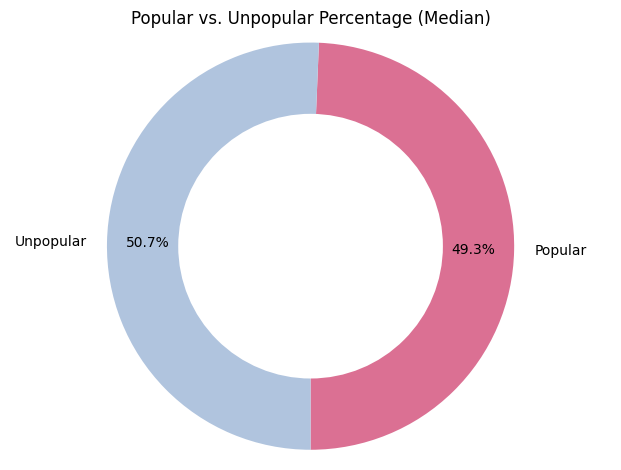

In [108]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, StringType, IntegerType


# Calculate the number of popular and unpopular news using the median threshold
median_value = df.approxQuantile("shares", [0.5], 0.01)[0]
popular_count = df.filter(col("shares") > median_value).count()
unpopular_count = df.filter(col("shares") <= median_value).count()

# Create a PySpark DataFrame for visualization with an explicit schema
spark = SparkSession.builder.appName("PopularUnpopularPieChart").getOrCreate()
schema = StructType([StructField("Category", StringType(), True), StructField("Count", IntegerType(), True)])
data = [('Popular', popular_count), ('Unpopular', unpopular_count)]
df_pandas = spark.createDataFrame(data, schema=schema).toPandas()

# Create a pie chart
colors = ['palevioletred', 'lightsteelblue']
plt.pie(df_pandas['Count'], labels=df_pandas['Category'], autopct='%1.1f%%', startangle=270, colors=colors, pctdistance=0.8)
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title("Popular vs. Unpopular Percentage (Median)")
plt.tight_layout()
plt.show()


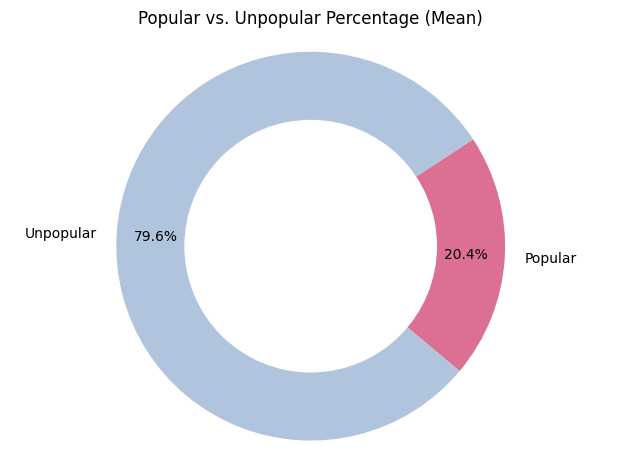

In [109]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when


# Calculate the number of popular and unpopular news using the mean threshold
mean_value = df.agg({"shares": "mean"}).collect()[0][0]
popular_count_mean = df.filter(col("shares") > mean_value).count()
unpopular_count_mean = df.filter(col("shares") <= mean_value).count()

# Create a PySpark DataFrame for visualization with an explicit schema
spark = SparkSession.builder.appName("PopularUnpopularPieChartMean").getOrCreate()
schema_mean = StructType([StructField("Category", StringType(), True), StructField("Count", IntegerType(), True)])
data_mean = [('Popular', popular_count_mean), ('Unpopular', unpopular_count_mean)]
df_pandas_mean = spark.createDataFrame(data_mean, schema=schema_mean).toPandas()

# Create a pie chart for mean threshold
colors_mean = ['palevioletred', 'lightsteelblue']
plt.pie(df_pandas_mean['Count'], labels=df_pandas_mean['Category'], autopct='%1.1f%%', startangle=320, colors=colors_mean, pctdistance=0.8)
centre_circle_mean = plt.Circle((0, 0), 0.65, fc='white')
fig_mean = plt.gcf()
fig_mean.gca().add_artist(centre_circle_mean)
plt.axis('equal')
plt.title("Popular vs. Unpopular Percentage (Mean)")
plt.tight_layout()
plt.show()


If the mean number of shares (3395) is used as the threshold, the popular and unpopular classes would be imbalanced. Additionally, the large range of number of shares would make the mean not appropriate to divide the news into two classes. Therefore, we decided to choose the median number of shares (1400) as the threshold.

### 3. Exploratory Data Analysis (EDA)

#### I
● Conduct EDA to understand the characteristics of popular and non-popular articles.


**Bar chart showing the number of class instances over different day of week**

In [110]:
Wd = df.columns[29:36]
Wd

['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday']

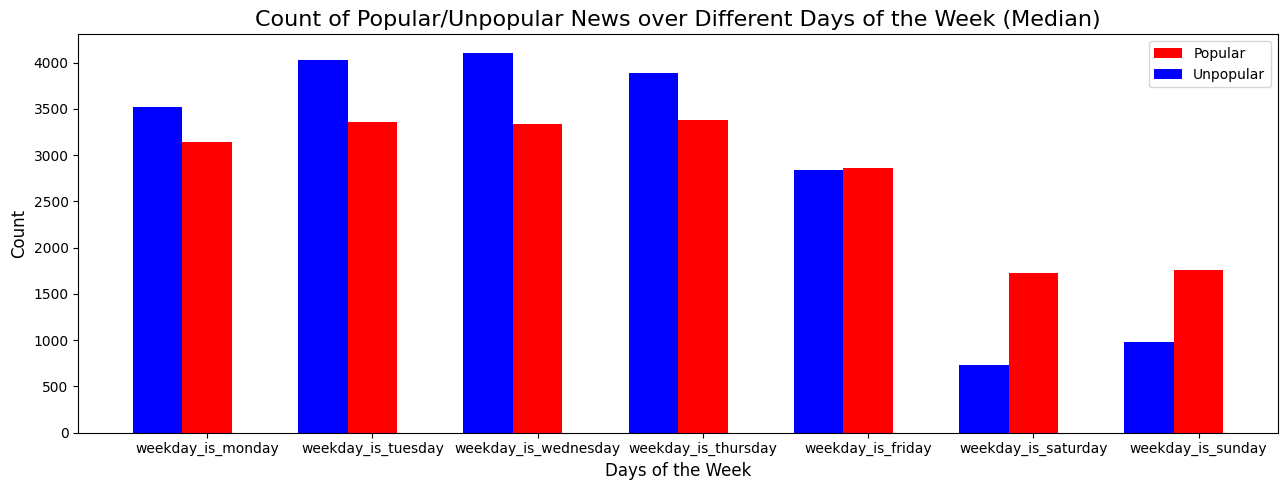

In [111]:
import numpy as np

# Filter the DataFrame for popular and unpopular news
Unpop2 = df.filter(col('popularity_median') == 0)
Pop2 = df.filter(col('popularity_median') == 1)



# Sum the counts for each day of the week
Unpop_day2 = Unpop2.select(Wd).groupBy().sum().collect()[0]
Pop_day2 = Pop2.select(Wd).groupBy().sum().collect()[0]


# Plot the bar chart
fig = plt.figure(figsize=(13, 5))
plt.title("Count of Popular/Unpopular News over Different Days of the Week (Median)", fontsize=16)
plt.bar(np.arange(len(Wd)), Pop_day2, width=0.3, align="center", color='r', label="Popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width=0.3, align="center", color='b', label="Unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of the Week", fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Bar chart showing the number of class instances over different day of week**

In [112]:
Dc = df.columns[11:17]
Dc

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world']

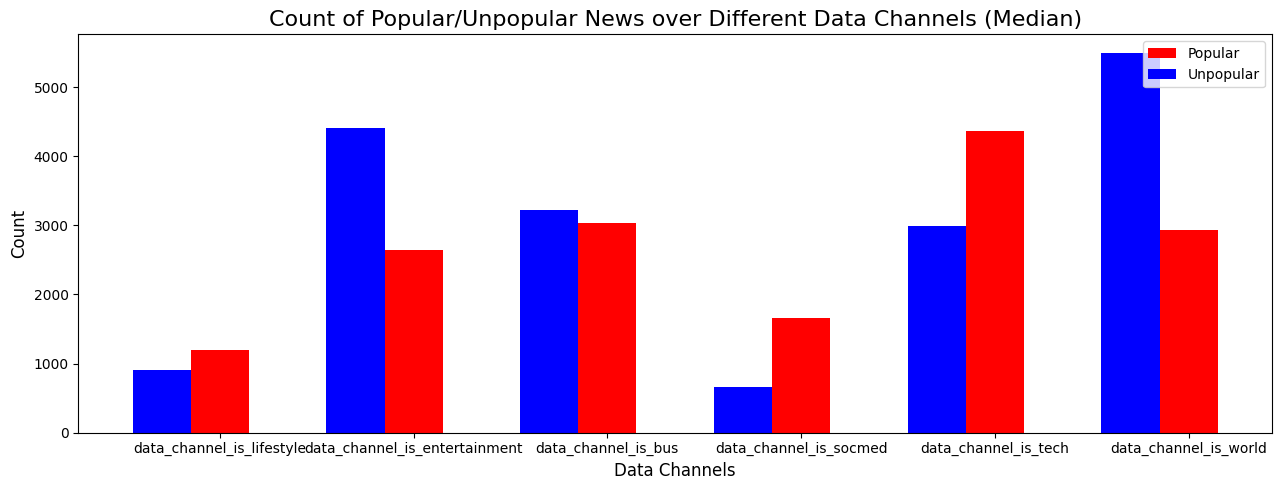

In [113]:

# Sum the counts for each data channel
Unpop_day4 = Unpop2.select(Dc).groupBy().sum().collect()[0]
Pop_day4 = Pop2.select(Dc).groupBy().sum().collect()[0]



# Plot the bar chart
fig = plt.figure(figsize=(13, 5))
plt.title("Count of Popular/Unpopular News over Different Data Channels (Median)", fontsize=16)
plt.bar(np.arange(len(Dc)), Pop_day4, width=0.3, align="center", color='r', label="Popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width=0.3, align="center", color='b', label="Unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Data Channels", fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


####II
● Analyze the distribution of key features and their impact on news popularity.

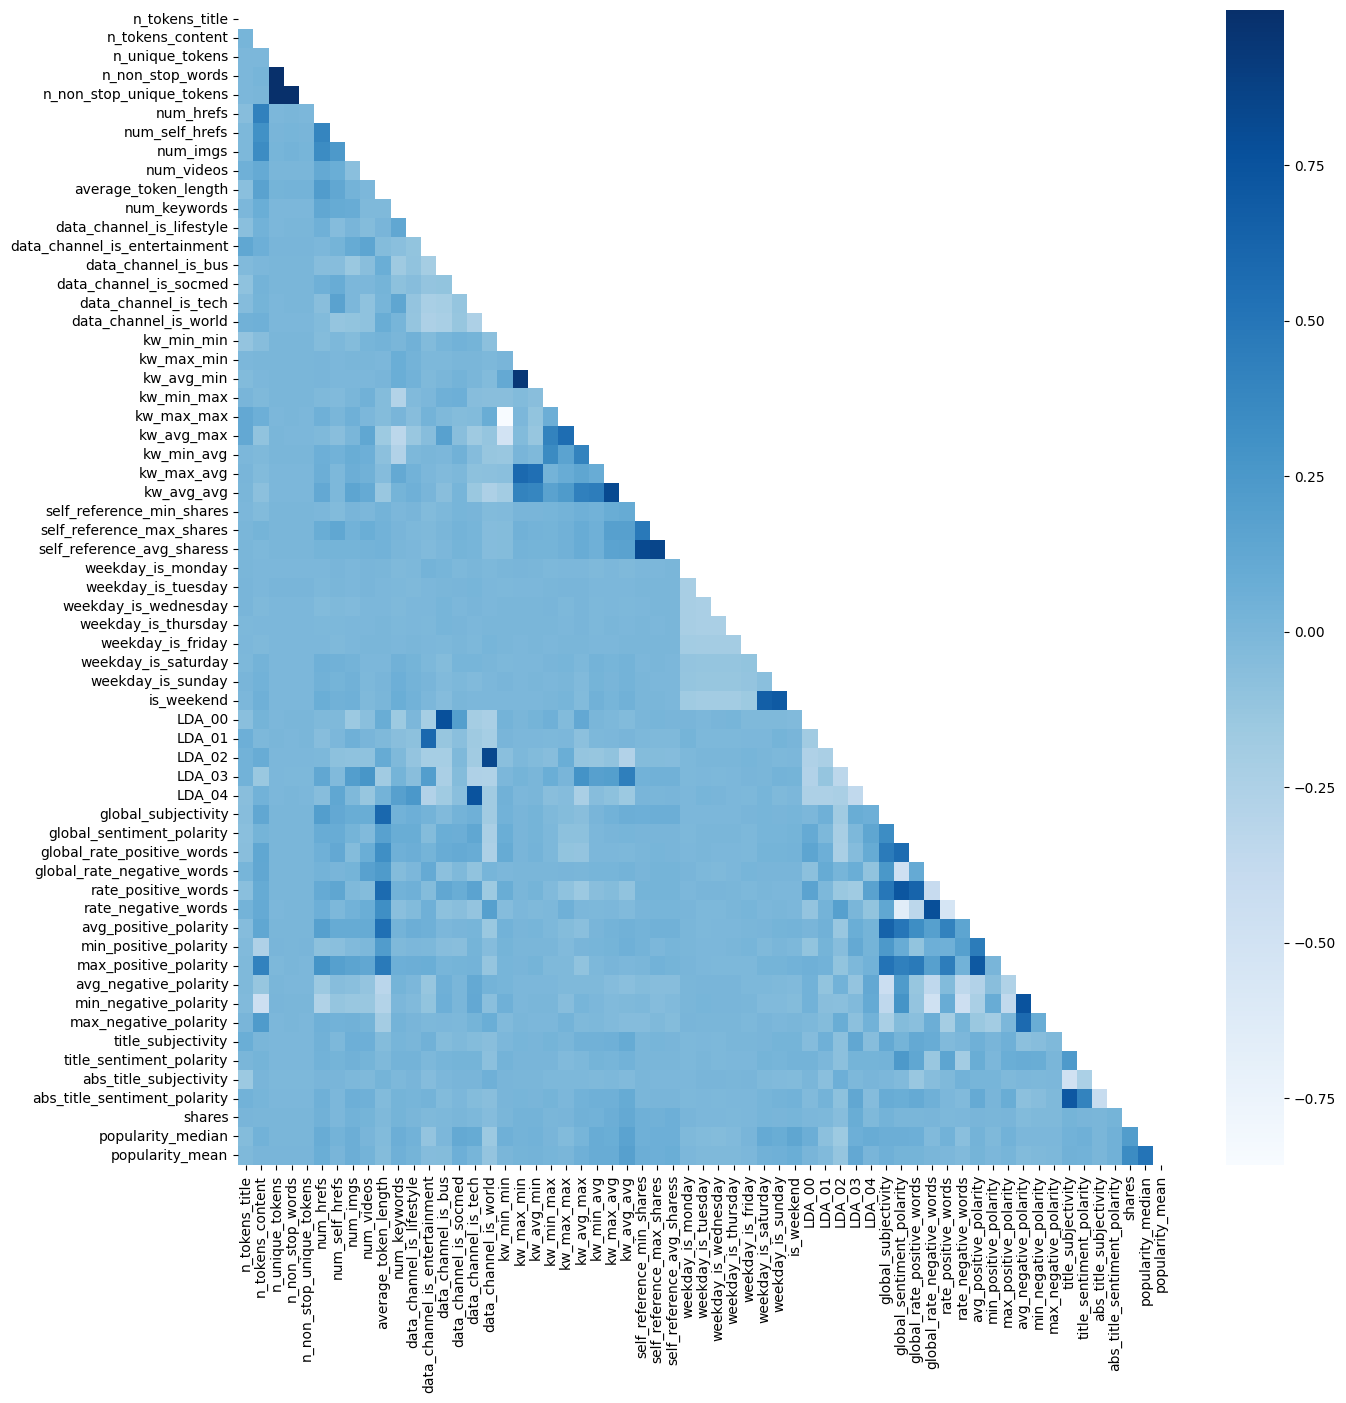

In [114]:
import seaborn as sns

# Selecting only numeric columns for correlation analysis
numeric_cols = [col_name for col_name, data_type in df.dtypes if 'double' in data_type or 'int' in data_type]
numeric_df = df.select(numeric_cols)

# Calculate the correlation matrix
cor = numeric_df.toPandas().corr()

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(cor, dtype=bool))

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(cor, cmap='Blues', mask=mask)
plt.show()


**Create histograms and box plots for key features to understand their distribution.**


**Use these visualizations to identify outliers and the general shape of the data.**

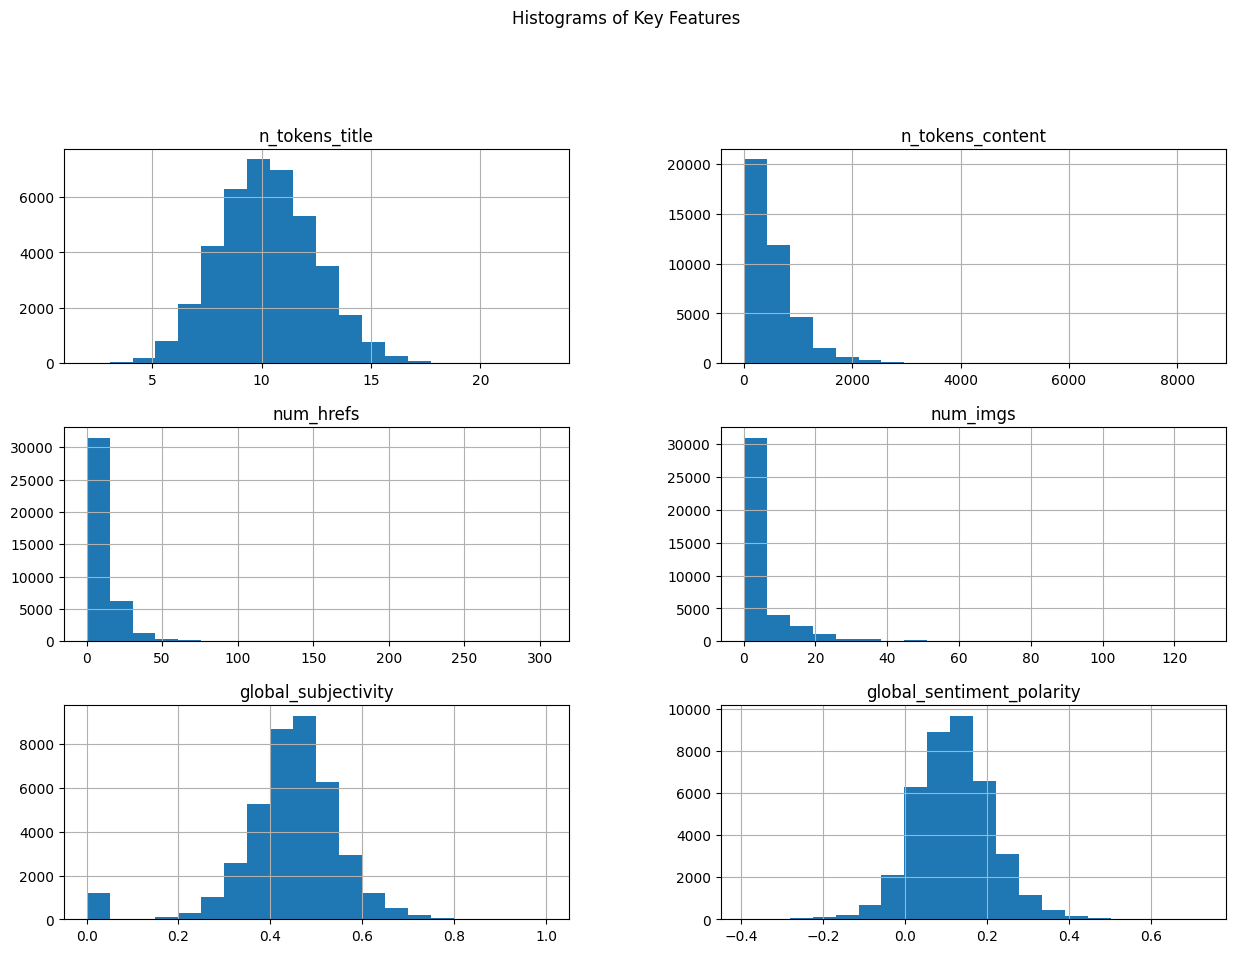

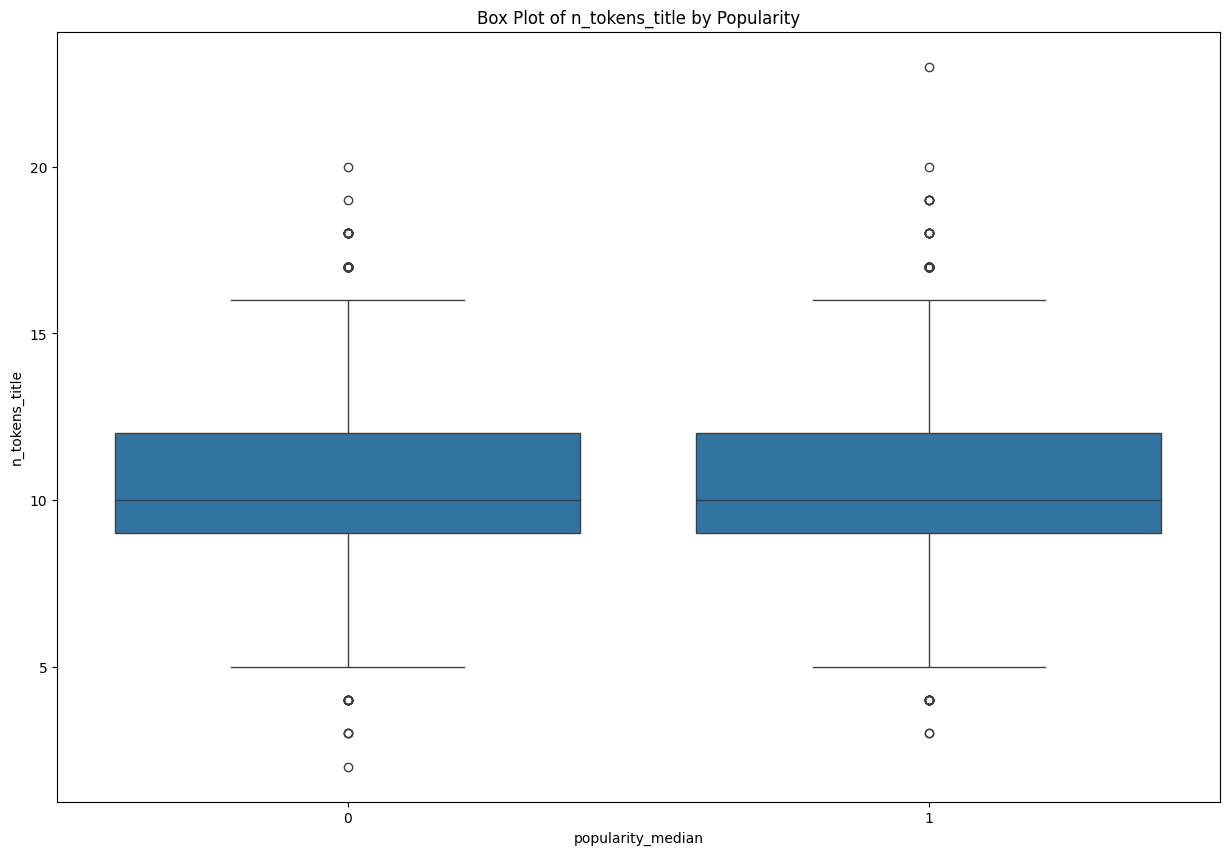

In [115]:
# key features for analysis
key_features = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'global_subjectivity', 'global_sentiment_polarity']

# Convert to Pandas for visualization
key_features_data = df.select(*key_features, 'popularity_median').toPandas()

# Plot histograms
key_features_data[key_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Key Features', y=1.02)
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=key_features_data, x='popularity_median', y='n_tokens_title')
plt.title('Box Plot of n_tokens_title by Popularity')
plt.show()


##### Correlation Analysis:

Calculate the correlation matrix to understand the relationships between features and the target variable.

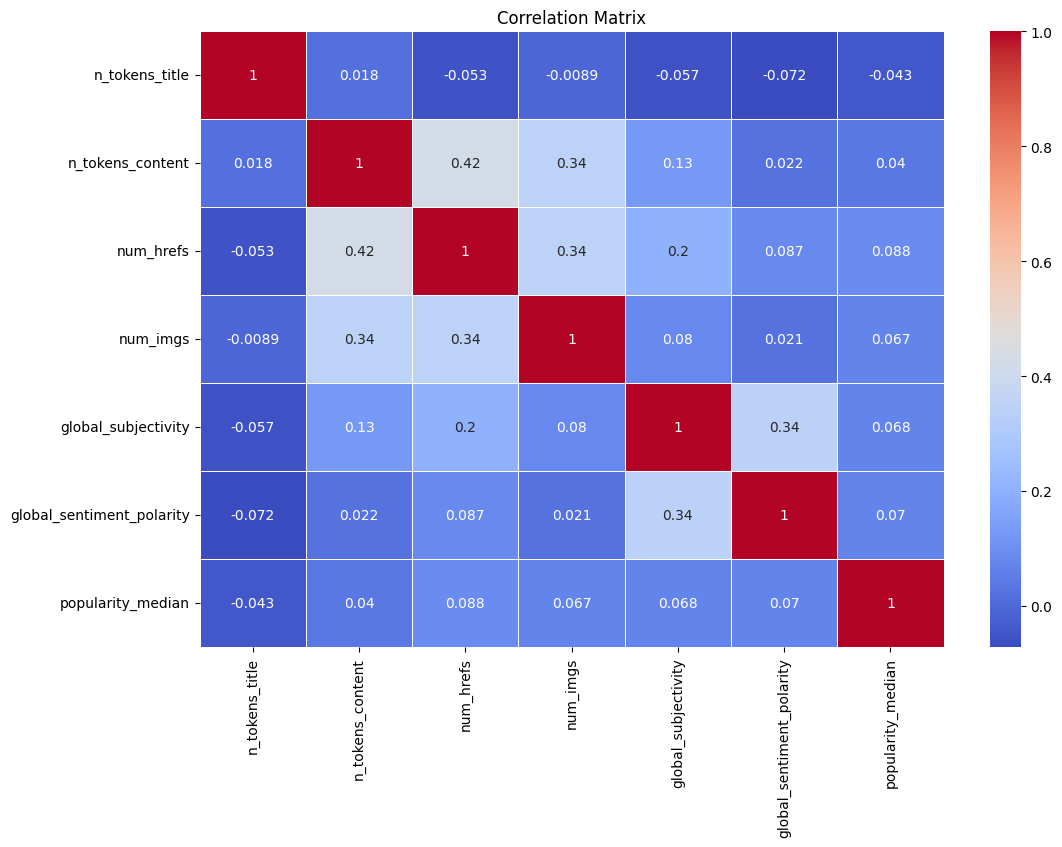

In [116]:
# Calculate the correlation matrix
correlation_matrix = df.select(*key_features, 'popularity_median').toPandas().corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


##### Pair Plots:
Create pair plots to visualize relationships between pairs of features

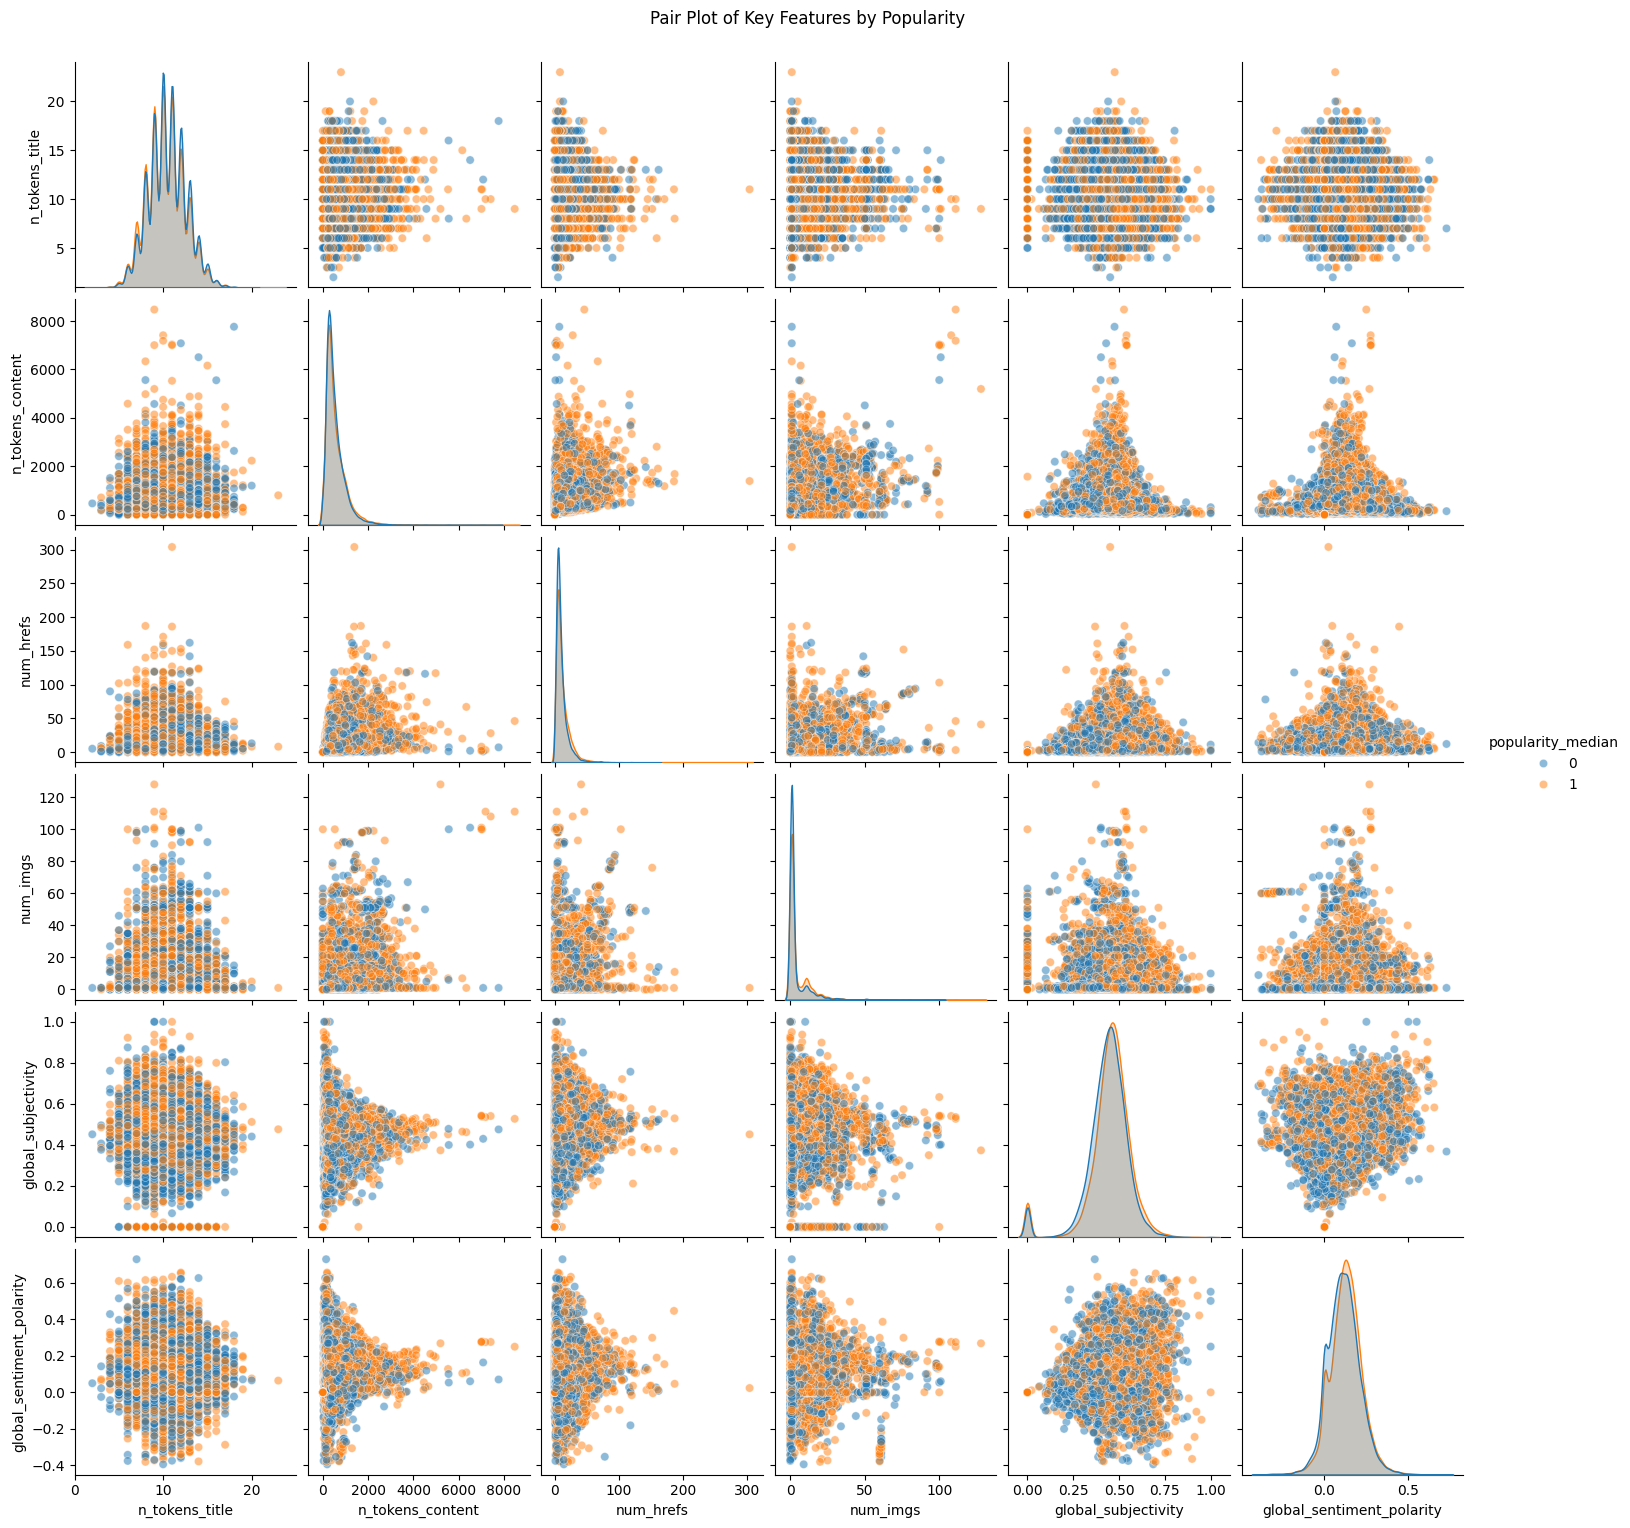

In [117]:
# Pair plot
sns.pairplot(key_features_data, hue='popularity_median', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Key Features by Popularity', y=1.02)
plt.show()


##### Statistical Tests:
Conduct statistical tests (e.g., t-tests, ANOVA) to compare feature distributions across different levels of popularity.

In [118]:
from scipy.stats import ttest_ind


# Separate the groups for the t-test
popularity_groups = [group['n_tokens_title'].values for name, group in key_features_data.groupby('popularity_median')]

# Perform the t-test
t_stat, p_value = ttest_ind(*popularity_groups)

# Print the results
print(f'T-Stat: {t_stat}, P-Value: {p_value}')


T-Stat: 8.667575627908061, P-Value: 4.578232456238384e-18


###4. Feature Engineering


#### I
● Create new features that could potentially enhance model performance, such as article length categories, weekday of publication, etc.


In [119]:
from pyspark.sql.functions import when, dayofweek
from pyspark.ml.feature import Bucketizer, OneHotEncoder
from pyspark.ml import Pipeline

# Create new feature for article length categories
bucketizer = Bucketizer(splits=[-float("inf"), 500, 1000, float("inf")], inputCol="n_tokens_content", outputCol="article_length_category")
df = bucketizer.transform(df)


#### II
● Use VectorAssembler to combine all feature columns into a single vector column.

In [120]:
from pyspark.ml.feature import VectorAssembler


# Use VectorAssembler to combine all feature columns into a single vector column
feature_columns = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'global_subjectivity', 'global_sentiment_polarity',
                   'article_length_category']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
output = assembler.transform(df)

# Display the result
output.select("features").show(truncate=False)

+---------------------------------------------------------+
|features                                                 |
+---------------------------------------------------------+
|[12.0,219.0,4.0,1.0,0.521617145481,0.0925619834711,0.0]  |
|[9.0,255.0,3.0,1.0,0.341245791246,0.148947811448,0.0]    |
|[9.0,211.0,3.0,1.0,0.702222222222,0.323333333333,0.0]    |
|[9.0,531.0,9.0,1.0,0.42984968735,0.100704665705,1.0]     |
|[13.0,1072.0,19.0,20.0,0.513502122877,0.281003475691,2.0]|
|[10.0,370.0,2.0,0.0,0.437408648699,0.0711841921519,0.0]  |
|[8.0,960.0,21.0,20.0,0.514480300844,0.268302724212,1.0]  |
|[12.0,989.0,20.0,20.0,0.543474234099,0.298613469863,1.0] |
|[11.0,97.0,2.0,0.0,0.538888888889,0.161111111111,0.0]    |
|[10.0,231.0,4.0,1.0,0.313888888889,0.0518518518519,0.0]  |
|[9.0,1248.0,11.0,1.0,0.482059813124,0.102350145729,2.0]  |
|[10.0,187.0,7.0,1.0,0.477164502165,0.15,0.0]             |
|[9.0,274.0,18.0,11.0,0.534950029394,0.100727513228,0.0]  |
|[9.0,285.0,4.0,0.0,0.509743589744,-0.05

## 5. Model Building

In [121]:
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pyspark.ml.classification import RandomForestClassifier


### ● Split the dataset into training and testing sets (80:20 ratio).

In [122]:
# Split the dataset into training and testing sets (80:20 ratio)
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

### ● Train a classification model (e.g., Logistic Regression, Decision Tree, or Random Forest) to predict article popularity.

In [123]:
# Instantiate the Logistic Regression model
lr = LogisticRegression(labelCol="popularity_median", featuresCol="features")

# Create a Pipeline
pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(train_data)


Evaluate the Model


In [124]:
# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="popularity_median")
accuracy = evaluator.evaluate(predictions)


In [125]:
print(f"Accuracy of LogisticRegression: {accuracy}")

Accuracy of LogisticRegression: 0.5765305522465111


### ● Optionally, explore other algorithms and compare their performances.

#### DecisionTreeClassifier

In [126]:

# Instantiate the Decision Tree Classifier model
dt = DecisionTreeClassifier(labelCol="popularity_median", featuresCol="features")

# Update the Pipeline
pipeline = Pipeline(stages=[assembler, dt])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
accuracy = evaluator.evaluate(predictions)




In [127]:
print(f"Accuracy of DecisionTreeClassifier: {accuracy}")

Accuracy of DecisionTreeClassifier: 0.4794325416844859


#### KNN

In [128]:
df = assembler.transform(df)
# Convert PySpark DataFrame to Pandas DataFrame
pdf = df.select(['features', 'popularity_median']).toPandas()

In [129]:
# Split data into training and testing sets
X = pdf['features'].tolist()
y = pdf['popularity_median'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate KNN classifier
k = 3  # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


In [130]:
print(f"Accuracy of KNN: {accuracy}")

Accuracy of KNN: 0.5279354269138605


#### Random Forest model


In [132]:
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [133]:
# Train a Random Forest model
rf = RandomForestClassifier(labelCol="popularity_median", featuresCol="features")
model = rf.fit(train_data)

## 6. Model Evaluation

In [134]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

### ● Evaluate the model's performance using metrics such as accuracy, precision, recall, F1 score, and AUC-ROC.

In [135]:


# Binary Classification Metrics
evaluator_binary = BinaryClassificationEvaluator(labelCol="popularity_median", metricName="areaUnderROC")
auc_roc = evaluator_binary.evaluate(predictions)

# Multiclass Classification Metrics
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="popularity_median", metricName="accuracy")
accuracy = evaluator_multiclass.evaluate(predictions)

print(f"AUC-ROC: {auc_roc}")
print(f"Accuracy: {accuracy}")



AUC-ROC: 0.4794325416844859
Accuracy: 0.5694568690095847


### ● Analyze the confusion matrix to understand the model's strengths and weaknesses.

In [136]:
# Convert predictions to RDD for use with MulticlassMetrics
predictions_and_labels = predictions.select("prediction", "popularity_median").rdd.map(lambda row: (float(row["prediction"]), float(row["popularity_median"])))

# Instantiate MulticlassMetrics
metrics = MulticlassMetrics(predictions_and_labels)

# Confusion Matrix
confusion_matrix = metrics.confusionMatrix().toArray()
print("Confusion Matrix:")
print(confusion_matrix)


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
[[2779. 1167.]
 [2202. 1677.]]


## 7. Advanced Analysis (Optional)

### ● Perform feature importance analysis to identify the most influential features for predicting news popularity.

In [137]:
# Extract feature importance
importances = model.featureImportances.toArray()

# Create a dictionary to store feature names and their importance scores
feature_importance_dict = dict(zip(feature_columns, importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

num_imgs: 0.24481306519145257
num_hrefs: 0.23684745059864346
global_subjectivity: 0.19997560053611213
global_sentiment_polarity: 0.13723607426342982
n_tokens_content: 0.12619172417597793
n_tokens_title: 0.03282121257573753
article_length_category: 0.022114872658646496
